### Monte Carlo Estimation ###

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad
from scipy import stats
import random as rdm

$$ f(x) = \int_0^1 x^{-\alpha} e^{-x} \;dx $$

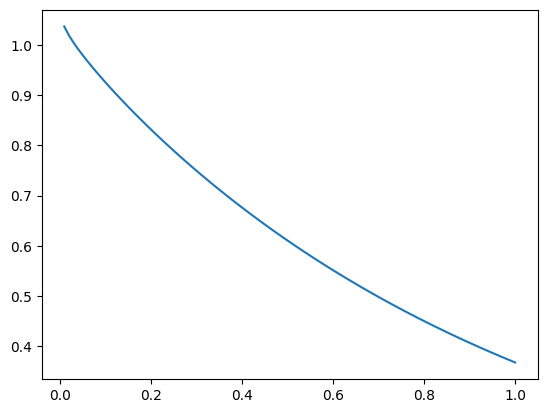

Integral: 0.640177


In [4]:
### FUNCTION INITIALIZATION ###

alpha = 0.01
f = lambda x: x**(-alpha) * np.exp(-x) # function
X = np.mgrid[1e-2:1:100j] # x mesh

plt.plot(X, f(X))
plt.show()

exp_result, error = quad(f, 0, 1) # calculate integral
print("Integral:", "%.6f" % exp_result)

In [183]:
### MONTE CARLO ITEGRATION ###

def monte_carlo_integration(f, lower_bound, upper_bound, n):
    sum = 0.0
    for _ in range(n):
        # generate random sample within the specified range
        sample = np.random.uniform(lower_bound, upper_bound)
        
        # evaluate the target function at the sample point and add it to the total
        sum += f(sample)

    # calculate the estimated integral by averaging the function values and scaling by the range
    estimated_integral = sum / n * (upper_bound - lower_bound)
    return estimated_integral

lower_bound = 0  # lower bound of integration range
upper_bound = 1 # upper bound of integration range
n = 1000  # number of samples

result = monte_carlo_integration(f, lower_bound, upper_bound, n)

print("Estimated Integral:", "%.6f" % result)
print("Integral:", "%.6f" % exp_result)

Estimated Integral: 0.642134
Integral: 0.640177


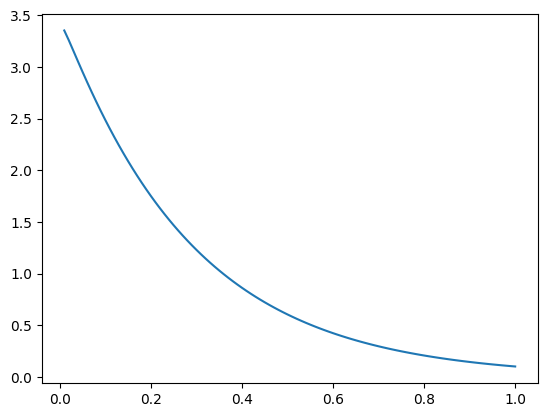

In [179]:
### GAMMA FUNCTION ###

# define the parameters of the gamma distribution for importance sampling
gamma_shape = alpha + 1
gamma_scale = 0.28

plt.plot(X, stats.gamma(a=gamma_shape, scale=gamma_scale).pdf(X))

In [182]:
### IMPORTANCE SAMPLING MONTE CARLO INTEGRATION ###

# create a gamma distribution object
gamma_dist = stats.gamma(a=gamma_shape, scale=gamma_scale)

def monte_carlo_integration(f, lower_bound, upper_bound, n):
    sum = 0.0
    count_within_bounds = 0  # counter for samples within bounds
    for _ in range(n):
        # sample from the gamma distribution
        sample = gamma_dist.rvs()
        
        # check if the sample is within the integration range
        if lower_bound <= sample <= upper_bound:
            count_within_bounds += 1
            # calculate the importance weight (ratio of target to gamma distribution)
            importance_weight = f(sample) / gamma_dist.pdf(sample)
            # add the weighted sample to the total
            sum += importance_weight

    # calculate the estimated integral based on the samples within bounds
    if count_within_bounds > 0:
        estimated_integral = (sum / count_within_bounds) * (upper_bound - lower_bound)
    else:
        estimated_integral = 0.0

    return estimated_integral

lower_bound = 0  # lower bound of integration range
upper_bound = 1  # upper bound of integration range
n = 1000  # number of samples

result = monte_carlo_integration(f, lower_bound, upper_bound, n)

print("Estimated Integral:", "%.6f" % result)
print("Integral:", "%.6f" % exp_result)

Estimated Integral: 0.642682
Integral: 0.640177
